
La forma analitica de las distancias es:

$$D_{A}(z) = \frac{f_{k}(\chi)}{1 + z} , \space D_{L} = (1+z) f_{k}(\chi)$$

donde:
$$ \chi(z) = \int_{0}^{z} \frac{dx}{E(x)} , \space E(z) = \frac{H(z)}{H_{0}}$$

La funcion de curvatura $f_{k}(\chi)$:


$$
f_{k}(\chi) = 
\begin{cases}
\dfrac{c}{H_{0}\sqrt{\Omega_{K,0}}}\;
\sinh\!\Big(\sqrt{\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} >0 \\
\dfrac{c}{H_{0}}\;\chi & \Omega_{K,0} = 0, \\
\dfrac{c}{H_{0}\sqrt{-\Omega_{K,0}}}\;
\sin\!\Big(\sqrt{-\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} < 0.

\end{cases}
$$
Con un componente de radiacion, materia, energia oscura (con ecuacion de estado w) y curvatura
$$
H^{2}(z) = H_{0}^{2} \left[ \Omega_{r,0}(1 +z )^{4} + \Omega_{m,0}(1 +z)^{3} + \Omega_{\Lambda,0}(1 +z)^{3(1+\omega)} + \Omega_{K,0}(1+z)^{2}\right]
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
h0 = 67.4
c = 300000          #km/s
w = -1
# omega_k = 0
#omega_r = omega_r*(1 +z)**4 

In [ ]:
def H2_z(z,omega_m, omega_lambda):
    return (h0**2)*(omega_m*(1+z)**3 + (omega_k(omega_m, omega_lambda))*(1 +z)**2 + omega_lambda*(1+z)**(3*(1+w)))

# def d_A(fk,z):
#     return fk/(1+z)

# def d_L(fk,z):
#     return (1 +z)*fk
def omega_k(omega_m, omega_lambda):
    return 1 - omega_m -omega_lambda

def E_z(z):
    return np.sqrt(H2_z(z, omega_lambda=0.7, omega_m=0.3))/h0

def chi(z):

    dz = np.diff(z)[-1]
    return np.cumsum(dz/E_z(z))

def f_k(z, omega_lambda, omega_m):
    

    f = np.zeros(shape=(omega_m, omega_lambda))

    o_k = omega_k(omega_m, omega_lambda)

    if o_k < 0:
        return c/(h0* np.sqrt(-o_k)) *np.sin(np.sqrt(-o_k)* chi(z))
    
    if o_k == 0:
        return c/(h0) *chi(z)
    
    if o_k > 0:
        return c/(h0* np.sqrt(o_k)) *np.sinh(np.sqrt(o_k)* chi(z))

In [21]:
omega_m = np.linspace(-1, 1, 100)
omega_lambda = np.linspace(-1,1, 100)

In [22]:
z = np.arange(0.001,3,0.001)
fk = f_k(z,omega_k(omega_m, omega_lambda))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

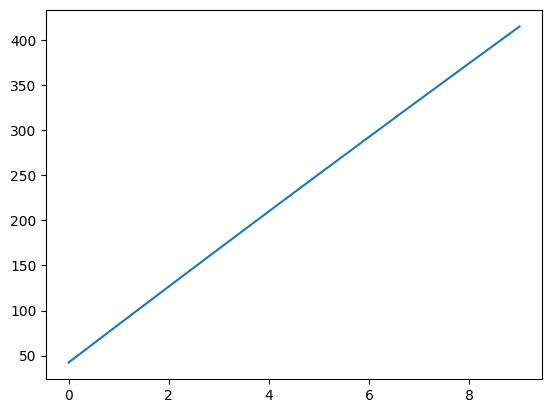

In [19]:
plt.plot(fk)